# 1 -Write a Matlab/Python function to calculate the discriminant function of the following form

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
w1 = np.array([[-5.01,-5.43,1.08,0.86,-2.67,4.94,-2.51,-2.25,5.56,1.03],

[-8.12,-3.48,-5.52,-3.78,0.63,3.29,2.09,-2.13,2.86,-3.33],

[-3.68,-3.54,1.66,-4.11,7.39,2.08,-2.59,-6.94,-2.26,4.33]]);

w2 = np.array([[-0.91,1.30,-7.75,-5.47,6.14,3.60,5.37,7.18,-7.39,-7.50],

[-0.18,-2.06,-4.54,0.50,5.72,1.26,-4.63,1.46,1.17,-6.32],

[-0.05,-3.53,-0.95,3.92,-4.85,4.36,-3.65,-6.66,6.30,-0.31]]);

w3 = np.array([[5.35,5.12,-1.34,4.48,7.11,7.17,5.75,0.77,0.90,3.52],

[2.26,3.22,-5.31,3.42,2.39,4.33,3.97,0.27,-0.43,-0.36],

[8.13,-2.66,-9.87,5.19,9.21,-0.98,6.65,2.41,-8.71,6.43]])

x1=0; x2=1 ;x3=2

# Write a function to calculate the Mahalanobis distance between an arbitrary point x and the mean, μi, of a Gaussian distribution with covariance matrix Σi

In [3]:
def mahalanobis(x,cov_mat,mean):
    x_mean = np.transpose(x)-mean
    x_mean_t = np.transpose(x_mean) 
    return np.dot(np.dot(x_mean,np.linalg.inv(cov_mat)),x_mean_t)

In [4]:
def discriminant(x,cov_w1,mean,pw):      
        #dimention
        d=x.shape[0] 
        x_dot_cov=-0.5*mahalanobis(x,cov_w1,mean)  
        temp=np.squeeze(x_dot_cov)-((d/2)*np.log(math.pi/2))-(0.5*np.log(np.linalg.det(cov_w1)))
        temp=temp+np.log(pw)
        return temp
def discriminant_2(x,cov_w1,mean,pw):      
    #dimention
    d=x.shape[0] 
    x_dot_cov=-0.5*mahalanobis(x,cov_w1,mean)  
    temp=np.squeeze(x_dot_cov)-((d/2)*np.log(math.pi/2))-(0.5*np.log(np.linalg.det(cov_w1)))
    return temp

In [5]:
def classifer_1(x,mean_vec,covariance,pw):#MAL
    result = np.empty(x.shape[0])
    return_i=0
    temp=0
    for i in enumerate(covariance):
        mean_= mean_vec[i[0]]
        cov_mat= i[1]
        pw_ =pw[i[0]]
        result[i[0]] = discriminant(x,cov_mat,mean_,pw_)
        if i[0] == 0:
            temp=discriminant(x,cov_mat,mean_,pw_)
            return_i=i[0]
        if temp < discriminant(x,cov_mat,mean_,pw_):
            temp=discriminant(x,cov_mat,mean_,pw_)
            return_i=i[0]
    return return_i

In [6]:
def classifer_2(x,mean_vec,covariance,pw):#ML
    result = np.empty(x.shape[0])
    temp = 0 
    return_i=0

    for i in enumerate(covariance):
        mean_= mean_vec[i[0]]
        cov_mat= i[1]
        pw_ =pw[i[0]]
        result[i[0]] = discriminant_2(x,cov_mat,mean_,pw_)
        if i[0] == 0:
            temp=discriminant_2(x,cov_mat,mean_,pw_)
            return_i=i[0]
        if temp < discriminant_2(x,cov_mat,mean_,pw_):
            temp=discriminant_2(x,cov_mat,mean_,pw_)
            return_i=i[0]
    return return_i

In [7]:
w1_cov= np.cov(w1 ,ddof=0)
mean_w1 = w1.mean(axis=1)
w2_cov= np.cov(w2 ,ddof=0)
mean_w2 = w2.mean(axis=1)
w3_cov= np.cov(w3 ,ddof=0)
mean_w3 = w3.mean(axis=1)
covariance=np.array([w1_cov,w2_cov,w3_cov])
mean=np.array([mean_w1,mean_w2,mean_w3])

In [8]:
pw= np.array([0.8,0.1,0.1])

In [9]:
p1 = np.array([[1],[2],[1]])
p2=np.array([[5],[3],[1]])
p3=np.array([[0],[0],[0]])
p4=np.array([[1],[0],[0]])

## Classify points p1 p2 p3 p4
#### Class W1 +> 0
#### Class W2 +> 1
#### Class W3 +> 2

In [10]:


print "point 1 with MAL classifier = > class :" ,classifer_1(p1,mean,covariance,pw)
print "point 2 with MAL classifier = > class :" ,classifer_1(p2,mean,covariance,pw)
print "point 3 with MAL classifier = > class :" ,classifer_1(p3,mean,covariance,pw)
print "point 4 with MAL classifier = > class :" ,classifer_1(p4,mean,covariance,pw)
print "##=====================================##"
print "point 1 with ML classifier = > class :" ,classifer_2(p1,mean,covariance,pw)
print "point 2 with ML classifier = > class :" ,classifer_2(p2,mean,covariance,pw)
print "point 3 with ML classifier = > class :" ,classifer_2(p3,mean,covariance,pw)
print "point 4 with ML classifier = > class :" ,classifer_2(p4,mean,covariance,pw)



point 1 with MAL classifier = > class : 0
point 2 with MAL classifier = > class : 0
point 3 with MAL classifier = > class : 0
point 4 with MAL classifier = > class : 0
##=====================================##
point 1 with ML classifier = > class : 1
point 2 with ML classifier = > class : 2
point 3 with ML classifier = > class : 0
point 4 with ML classifier = > class : 0


In [11]:
X1=[]
X2=[]
X3=[]
labels=[]
for i in range(10):
    X1.append(w1[0][i])
    X2.append(w1[1][i])
    X3.append(w1[2][i])
for i in range(10):
    X1.append(w2[0][i])
    X2.append(w2[0][i])
    X3.append(w2[0][i])
for i in range(10):
    X1.append(w3[0][i])
    X2.append(w3[0][i])
    X3.append(w3[0][i])
for i in range(10):
    labels.append(0)
for i in range(10):
    labels.append(1)
for i in range(10):
    labels.append(2)

X1=np.array(X1)
X2=np.array(X2)
X3=np.array(X3)

### X1 vs X2  MAL Classifier

([], <a list of 0 Text yticklabel objects>)

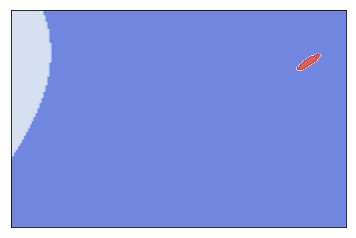

In [12]:
x_min, x_max = X1.min() - 1, X1.max() + 1
y_min, y_max = X2.min() - 1, X2.max() + 1
h = .1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
m=np.c_[xx.ravel(), yy.ravel()]
k =np.c_[m,np.ones(m.shape[0])]

Z=np.empty(m.shape[0])
for point in enumerate(k):
    testpoint =(point[1])
    Z[point[0]]=classifer_1(testpoint,mean,covariance,pw)
    
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(X2, X3, c=labels, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

### X1 vs X2  ML Classifier


([], <a list of 0 Text yticklabel objects>)

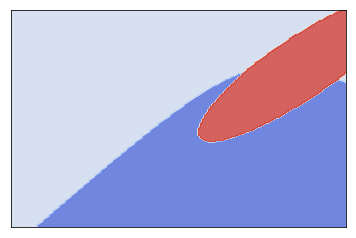

In [13]:
x_min, x_max = X1.min() - 1, X1.max() + 1
y_min, y_max = X2.min() - 1, X2.max() + 1
h = .1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
m=np.c_[xx.ravel(), yy.ravel()]
k =np.c_[m,np.ones(m.shape[0])]

Z=np.empty(m.shape[0])
for point in enumerate(k):
    testpoint =(point[1])
    Z[point[0]]=classifer_2(testpoint,mean,covariance,pw)
    
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(X2, X3, c=labels, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

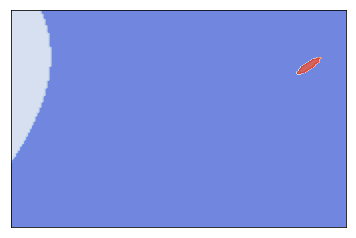

In [14]:
x_min, x_max = X1.min() - 1, X1.max() + 1
y_min, y_max = X3.min() - 1, X3.max() + 1
h = .1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
m=np.c_[xx.ravel(), yy.ravel()]
k =np.c_[m,np.ones(m.shape[0])]

Z=np.empty(m.shape[0])
for point in enumerate(k):
    testpoint =(point[1])
    Z[point[0]]=classifer_1(testpoint,mean,covariance,pw)
    
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(X2, X3, c=labels, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

-8.75 8.18


([], <a list of 0 Text yticklabel objects>)

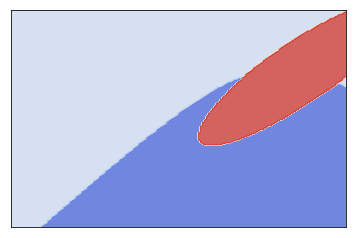

In [15]:
x_min, x_max = X1.min() - 1, X1.max() + 1
y_min, y_max = X3.min() - 1, X3.max() + 1
print x_min ,x_max

h = .1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
m=np.c_[xx.ravel(), yy.ravel()]
k =np.c_[m,np.ones(m.shape[0])]

Z=np.empty(m.shape[0])
for point in enumerate(k):
    testpoint =(point[1])
    Z[point[0]]=classifer_2(testpoint,mean,covariance,pw)
    
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(X2, X3, c=labels, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

-9.12 8.18


([], <a list of 0 Text yticklabel objects>)

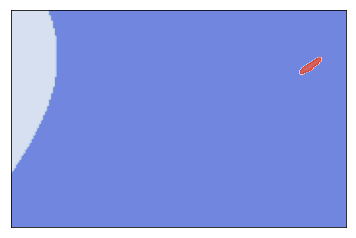

In [16]:
x_min, x_max = X2.min() - 1, X2.max() + 1
y_min, y_max = X3.min() - 1, X3.max() + 1
print x_min ,x_max
h = .1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

m=np.c_[xx.ravel(), yy.ravel()]
k =np.c_[m,np.ones(m.shape[0])]

Z=np.empty(m.shape[0])
for point in enumerate(k):
    testpoint =(point[1])
    Z[point[0]]=classifer_1(testpoint,mean,covariance,pw)
    
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(X2, X3, c=labels, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

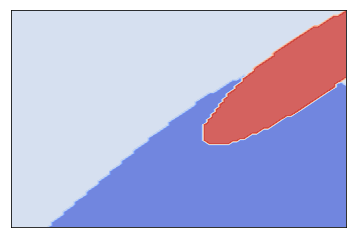

In [17]:
x_min, x_max = X2.min() - 1, X2.max() + 1
y_min, y_max = X3.min() - 1, X3.max() + 1
h = .2  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
m=np.c_[xx.ravel(), yy.ravel()]
k =np.c_[m,np.ones(m.shape[0])]

Z=np.empty(m.shape[0])
for point in enumerate(k):
    testpoint =(point[1])
    Z[point[0]]=classifer_2(testpoint,mean,covariance,pw)
    
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(X2, X3, c=labels, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())